<a href="https://colab.research.google.com/github/ephetpv/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Sobrevivientes del Titanic__

---

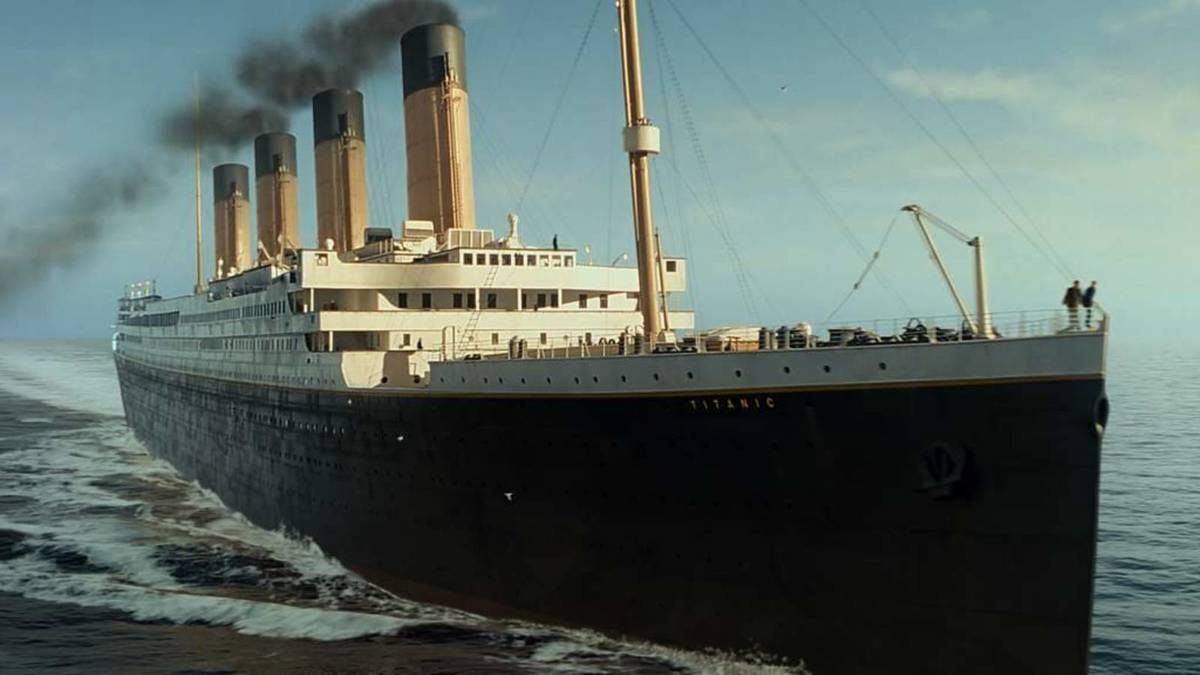
<br>
## Identificación del Problema
* ¿Qué problema identificaron? 

Alta mortalidad en el hundimiento del Titanic.
Problema de clasismo influenció en el número de sobrevivientes en el hundimiento del Titanic.

* ¿Qué investigaron sobre el tema? 

En el Titanic había aproximadamente (no se sabe el número exacto) 2224 personas entre pasajeros y gente de la tripulación, de las cuales solo aproximadamente (tampoco se tiene el número exacto) 720 sobrevivieron, a pesar de que el crucero contaba con suficientes barcos salvavidas como para que 1178 personas pudieran sobrevivir. Además, la mayoria de la gente que sobrevivió tenian ciertas características en común, principalmente sexo y clase, especificamente una mayor proporción de mujeres y gente de primera clase sobrevivió comparado con otras categorías.

* ¿Qué soluciones se han intentado/hecho anteriormente para intentar entender/resolver el problema?<br>

Se han realizado diferentes modelos de machine learning, tales como modelos de clasificación, para identificar qué variables de cada uno de los registros, equivalentes a una persona a bordo del Titanic, fueron las que tuvieron más peso en determinar si sobrevivían o no.

## Planteamiento de preguntas clave
Plantea una serie de preguntas sobre el problema que te interesa y debate con tus compañeros y la experta si son las mejores preguntas que se pueden hacer para resolver el problema, o si son preguntas que es posible responder.
<font color=red>AAA</font>

* ¿Sobrevivieron más mujeres u hombres?
* ¿Qué clase tuvo un mayor índice de supervivencia?
* ¿Cuáles fueron los rangos de edades donde más personas sobrevivieron?
* ¿Qué variable tuvo mayor influencia en la supervivencia de la persona?
* De acuerdo a la variable clase ¿Se puede afirmar que hubo desigualdad en el número de supervivientes de acuerdo a la clase 

## Colección de Datos
1. Documenta tu proceso para obtener el dataset, junto con comentarios relevantes sobre la información que consiguieron (o cómo la consiguieron). 

Se obtuvo la base de datos de https://www.kaggle.com, la cual es una página muy popular para obtener bases de datos con las cuales trabajar. 

2. De ahora en adelante, comiencen a rastrear bien el código que usan para obtener el dataset y para procesarlo.

## Análisis Exploratorio de Datos
¿Qué hallazgos preliminares encontraros en su exploración básica de datos?

### Importar librerías

In [ ]:
# linear algebra
import numpy as np
# data processing
import pandas as pd
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
# algoritmos
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### Cargar los dataframes

In [ ]:
# Paths de Github a los dataframes crudos
path_train = 'https://raw.githubusercontent.com/wabinai/BEDU-BD-Postworks-Proyecto/main/Proyecto/train.csv'
path_test = 'https://raw.githubusercontent.com/wabinai/BEDU-BD-Postworks-Proyecto/main/Proyecto/test.csv'
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

### Diccionario de datos

| Variable | Descripción |
|:---:|:---:|
|Survived|Supervivencia|
|Pclass|Clase de ticket|
|Sex|Sexo|
|Age|Edad en años|
|Sibsp|# de herman@s/espos@s a bordo|
|Parch|# de papás/hij@s a bordo|
|Ticket|Número de ticket|
|Fare|Tarifa de pasajero|
|Cabin| Número de cabina|
|Embarked|Puerto de embarque|

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

>Se renombran las columnas:

In [ ]:
train.columns=['passenger_id','survived', 'p_class', 'name', 'sex', 'age', 'sib_sp', 'par_ch',
       'ticket', 'fare', 'cabin', 'embarked']
test.columns=['passenger_id', 'p_class', 'name', 'sex', 'age', 'sib_sp', 'par_ch', 'ticket', 'fare', 'cabin', 'embarked']

In [ ]:
train.head(3)

,passenger_id,survived,p_class,name,sex,age,sib_sp,par_ch,ticket,fare,cabin,embarked,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [ ]:
test.head(3)

,passenger_id,survived,p_class,name,sex,age,sib_sp,par_ch,ticket,fare,cabin,embarked,title
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   p_class       891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sib_sp        891 non-null    int64  
 7   par_ch        891 non-null    int64  
 8   ticket        891 non-null    object 
 9   fare          891 non-null    float64
 10  cabin         204 non-null    object 
 11  embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


El data set de train tiene 891 registros y 12 campos.

Las columnas que tienen valores faltantes son Age, Cabin y Embarked. Age puede ser un factor importante en la supervivencia. En cambio, la cabina tiene muchos valores faltantes y no aportaría demasiado a nuestro análisis. Embarked solo tiene dos valores faltantes que pueden ser sustituidos por el puerto más común.

 En el data set 2 campos son float, 5 son enteros y 5 son objetos. 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  418 non-null    int64  
 1   p_class       418 non-null    int64  
 2   name          418 non-null    object 
 3   sex           418 non-null    object 
 4   age           332 non-null    float64
 5   sib_sp        418 non-null    int64  
 6   par_ch        418 non-null    int64  
 7   ticket        418 non-null    object 
 8   fare          417 non-null    float64
 9   cabin         91 non-null     object 
 10  embarked      418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


El data set de test tiene 418 registros y 11 campos.

Las columnas que tienen valores faltantes son Age, Fare y Cabin. Así como el dataset pasado, cabin tiene muchos valores faltantes y se opta por descartarla. Fare solo tiene un valor faltante que pueden ser sustituidos por el promedio o mediana de la misma.

 En el data set 2 campos son float, 4 son enteros y 5 son objetos. 

> Para una mejor visualización de los datos faltantes por campo de la base train se calcula el porcentaje que estos representan:


In [ ]:
total = train.isna().sum().sort_values(ascending = False)
porcentajes = train.isna().sum()/train.isna().count()*100

In [ ]:
def to_percent(valor):
    return f'{valor:.2f}%'

In [ ]:
data_faltante = pd.concat([total,porcentajes.map(to_percent)], axis = 1, keys = ['Total','Porcentaje'])
data_faltante.head(4)

,Total,Porcentaje
cabin,687,77.10%
age,177,19.87%
embarked,2,0.22%
fare,0,0.00%


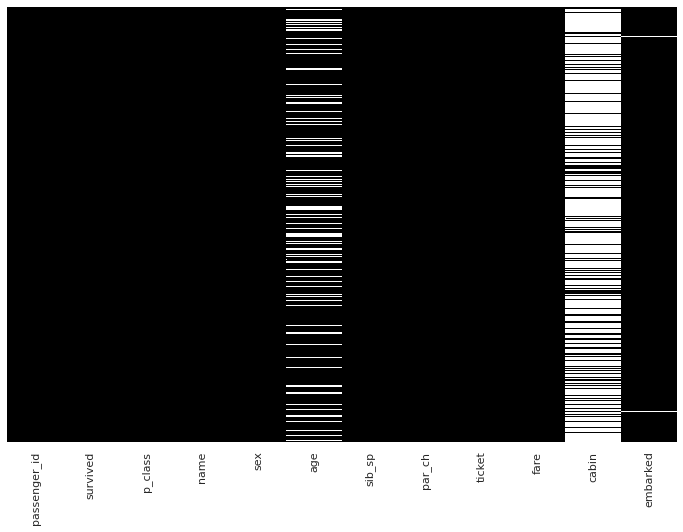

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isna(), yticklabels=False, 
           cbar=False, cmap='Greys_r')

En el gráfico anterior las líneas blancas representan datos nulos o faltantes en la base de datos de train, como se puede observar y como ya se vió con anterioridad, sólo las variables age, cabin y embarked tienen datos nulos. Siendo cabin la variable con más datos nulos.

Se tiene la siguiente matriz de coeficientes de correlación de Pearson:

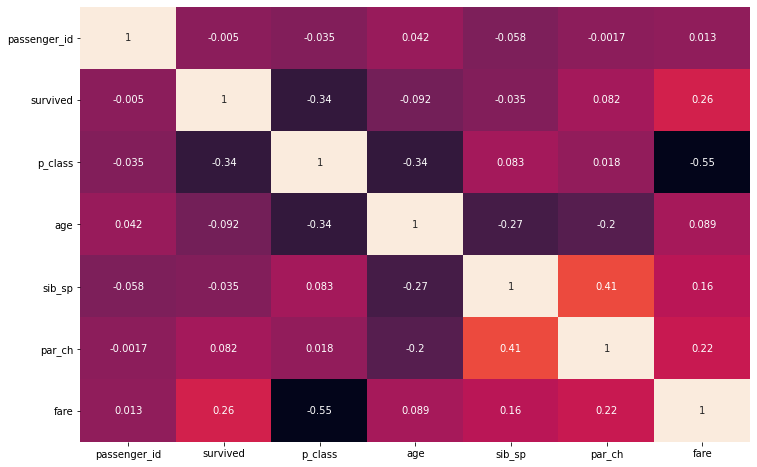

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(method='pearson'), annot=True, cbar=False)

La correlación es una medida que toma valores entre -1 y 1 que indica la relación lineal entre 2 variables. Entre más cercana al 0, menor es la relación entre las variables, es por ello que la diagonal es de unos, ya que 1 variable es totalmente dependiente de si misma. Entre mayor sea la correlación, más obscuro sera el color del recuadro.

Por ahora nos interesa la correlación entre la variable survived y las demás variables, se observa que las variables p_class y fare son las únicas que tienen una correlación significativa. En el caso de p_class se tiene que la correlación es de -0.34, esto indica una relación inversamente proporcional con la variable survived, es decir cuando survived aumenta (0 a 1) p_class disminuye, esto se puede interpretar como que la gente que pertenecia a las primeras clases tenian mayor probabilidad de sobrevivir. La variable fare tiene una correlación de 0.26, en este caso la relación es directamente proporcional, interpretandose como que la probabilidad de sobrevivir es mayor entre más grande sea el valor de fare. 

Es importante mencionar que la correlación de Pearson sólo puede utilizarse cuando las variables son cuantitativas.




In [ ]:
train.nunique().sort_values(ascending = False)

name            891
passenger_id    891
ticket          681
fare            248
cabin           147
age              88
par_ch            7
sib_sp            7
embarked          3
p_class           3
sex               2
survived          2
dtype: int64

Arriba se puede observar los datos únicos de cada campo. El Nombre y el id es normal que cada registro tenga datos únicos. Ticket es el tercer campo con más valores únicos. ¿El número de ticket influiría en la supervivencia de los tripulantes? Es muy poco probable, por lo que podríamos deshacernos de esta columna.

In [ ]:
train.describe()

,passenger_id,survived,p_class,age,sib_sp,par_ch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


En esta tabla hay varios datos interesantes. El primero y el que más nos interesa es que el 38% del conjunto de entrenamiento sobrevivió. Lo segunda es que la persona más pequeña a bordo era un bebé mientras la persona con mayor edad tenía 80 años. Por último, es importante notar que la variable fare tiene una media de 32.20 y una mediana de 14.45, sin embargo el valor máximo asciende hasta 512.32, es decir para esta variable existen valores atipicos.  

En conclusión, los campos más relevantes para la supervivencia serían todos excepto el PassengerId que es únicamente un número identificador que no aporta nada al estudio, la cabina, el nombre y el número de ticket.

In [ ]:
train['p_class'].mode()

0    3
dtype: int64

#### survived

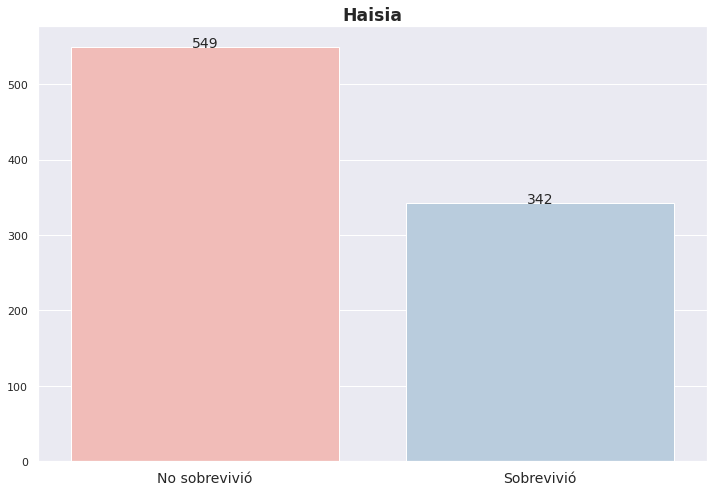

In [ ]:
plt.figure(figsize=(12,8))
sns.set_theme(style='darkgrid')
g = sns.countplot(x='survived', data=train, palette='Pastel1')
#g.set_yticks([t*50 for t in range(0,13)])
g.set_xticklabels(['No sobrevivió','Sobrevivió'], size=14)
g.set_title('Haisia', fontsize='x-large', fontweight='bold')
g.set_xlabel('') 
g.set_ylabel('')
 
for p in g.patches:
        g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, \
                    p.get_height()+0.1), ha='center', size=14)

In [ ]:
percent=train['survived'].sum()/len(train) * 100
print(f'Porcentaje de supervivencia: {percent:.1f}%')

Porcentaje de supervivencia: 38.4%


#### p_class

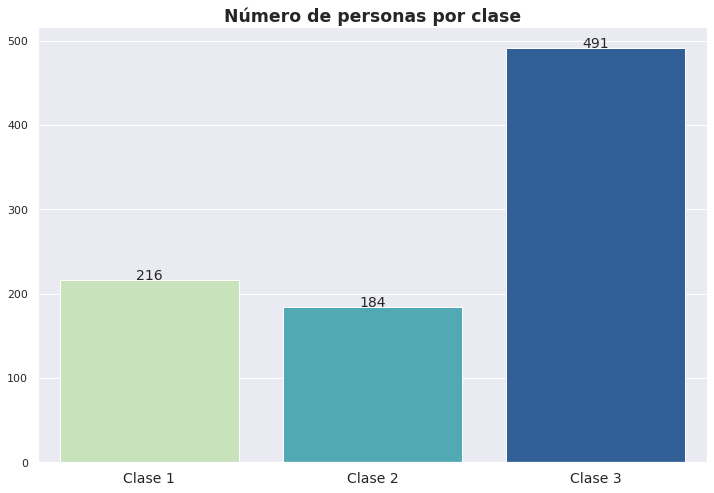

In [ ]:
plt.figure(figsize=(12,8))
g = sns.countplot(x='p_class', data=train, palette='YlGnBu')
g.set_title('Número de personas por clase', fontsize='x-large', fontweight='bold') 
g.set_xticklabels(['Clase 1','Clase 2','Clase 3'], size=14) 
g.set(xlabel='', ylabel='' )
for p in g.patches:
    g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, \
                    p.get_height()+0.1), ha='center', size=14)

[Text(0, 0, 'Clase 1'), Text(0, 0, 'Clase 2'), Text(0, 0, 'Clase 3')]

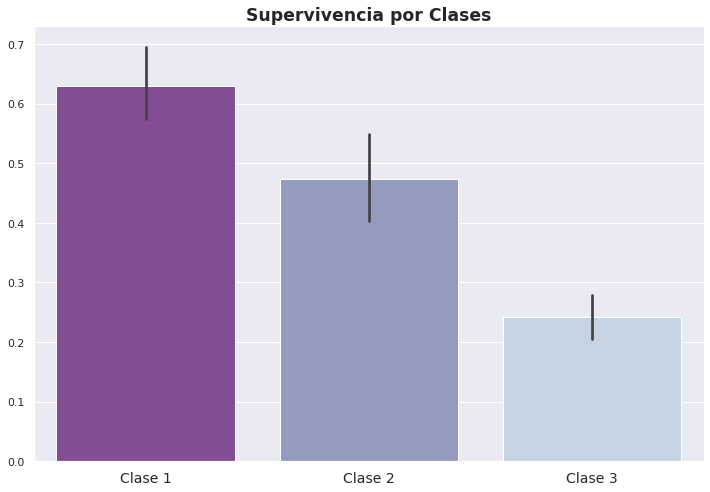

In [ ]:
plt.figure(figsize=(12,8))
g = sns.barplot(x='p_class', y='survived', data=train, palette='BuPu_r')
g.set_title('Supervivencia por Clases', fontsize='x-large', fontweight='bold')
g.set(xlabel='',ylabel='')
g.set_xticklabels(['Clase 1','Clase 2','Clase 3'], size=14)

#### sex

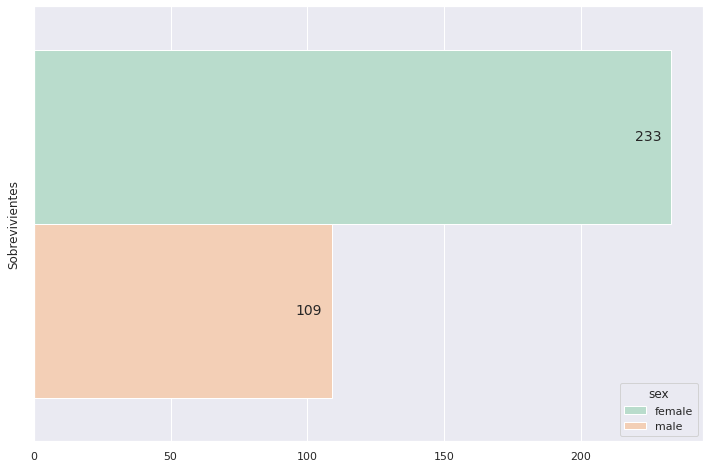

In [ ]:
plt.figure(figsize=(12,8))
g = sns.countplot(y=train[train['survived']==1]['survived'], hue='sex', 
                  hue_order=['female','male'], data=train, palette='Pastel2')
g.set(xlabel=None,ylabel='Sobrevivientes')
g.set_yticklabels('')
for p in g.patches:
    g.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), 
                xytext=(-10, -90),fontsize=14,textcoords='offset points', 
                horizontalalignment='right')

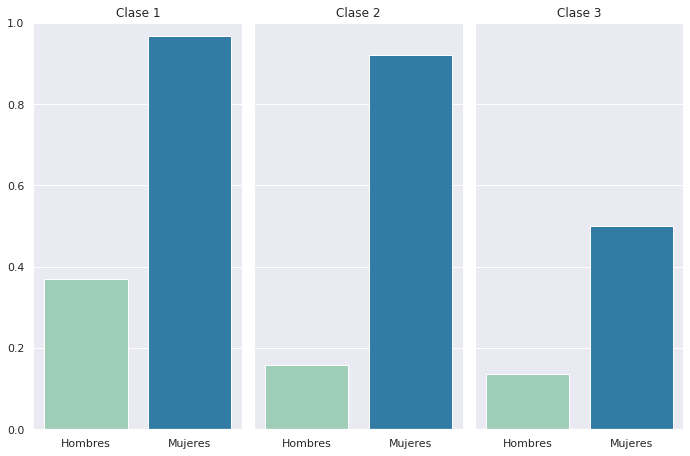

In [ ]:
g = sns.catplot(x="sex", y="survived", col="p_class",
                 data=train,kind="bar", ci=None,
                 aspect=.5, height=6.5, palette='YlGnBu')
g.set(xlabel=None,ylabel=None)
g.set_xticklabels(["Hombres", "Mujeres"])
g.set_titles("Clase {col_name}")
g.set(ylim=(0, 1))
g.despine(left=True)

#### age

<Figure size 1008x576 with 0 Axes>

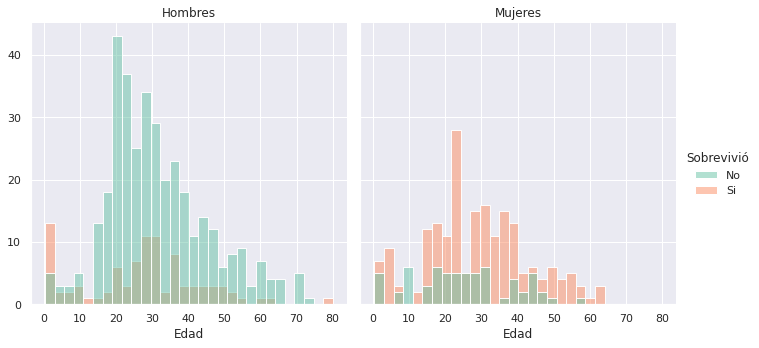

In [ ]:
plt.figure(figsize=(14,8))
g = sns.displot(train, x='age', col='sex', hue='survived', bins=30, palette='Set2')
g.set_axis_labels('Edad','')
axes = g.axes.flatten()
axes[0].set_title('Hombres')
axes[1].set_title('Mujeres')
g.legend.set_title('Sobrevivió')

new_labels = ['No', 'Si']
for t, l in zip(g.legend.texts, new_labels): t.set_text(l)

#### sib_sp

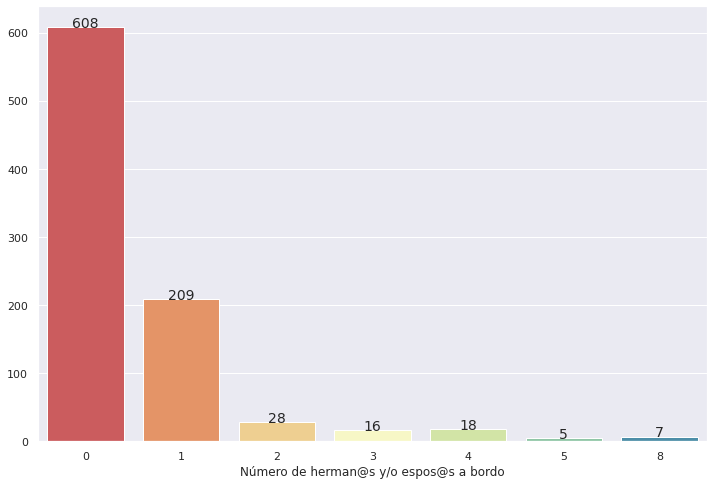

In [ ]:
plt.figure(figsize=(12,8))
g = sns.countplot(x = 'sib_sp', data=train, palette='Spectral')
g.set_xlabel('Número de herman@s y/o espos@s a bordo')
g.set_ylabel('')
for p in g.patches:
    g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, \
                    p.get_height()+0.1), ha='center', size=14)

Text(0, 0.5, '')

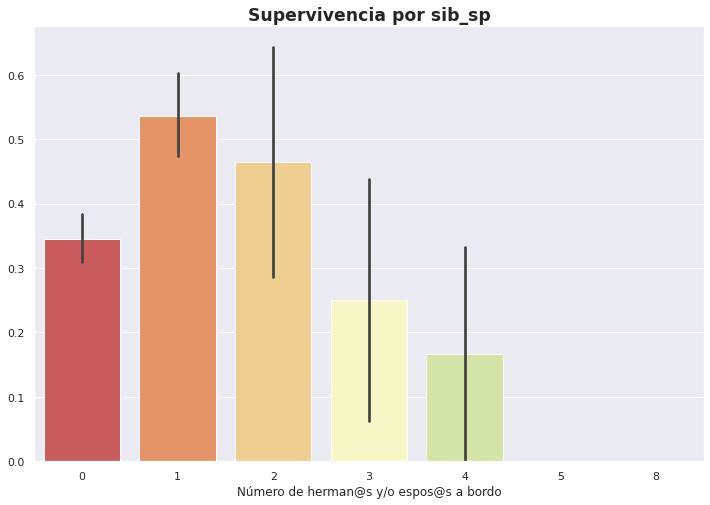

In [ ]:
plt.figure(figsize=(12,8))
g = sns.barplot(x='sib_sp', y='survived', data=train, palette='Spectral')
g.set_title('Supervivencia por sib_sp',fontsize='x-large', 
               fontweight='bold')
g.set_xlabel('Número de herman@s y/o espos@s a bordo')
g.set_ylabel('')

#### par_ch

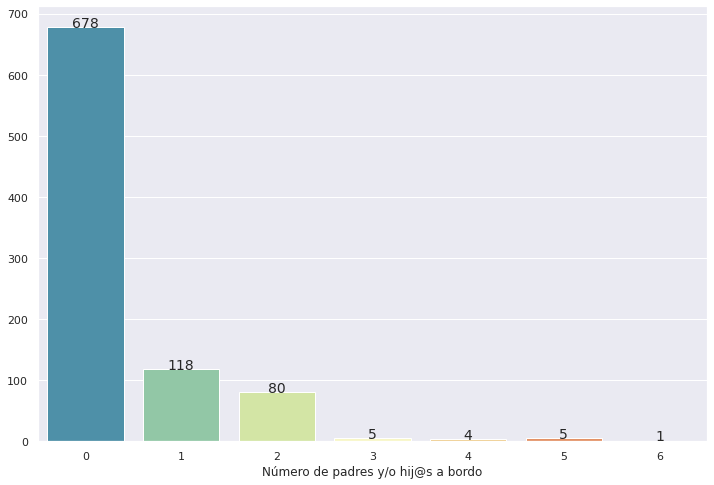

In [ ]:
plt.figure(figsize=(12,8))
g = sns.countplot(x = 'par_ch', data=train, palette='Spectral_r')
g.set_xlabel('Número de padres y/o hij@s a bordo')
g.set_ylabel('')
for p in g.patches:
    g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, \
                    p.get_height()+0.1), ha='center', size=14)

Text(0, 0.5, '')

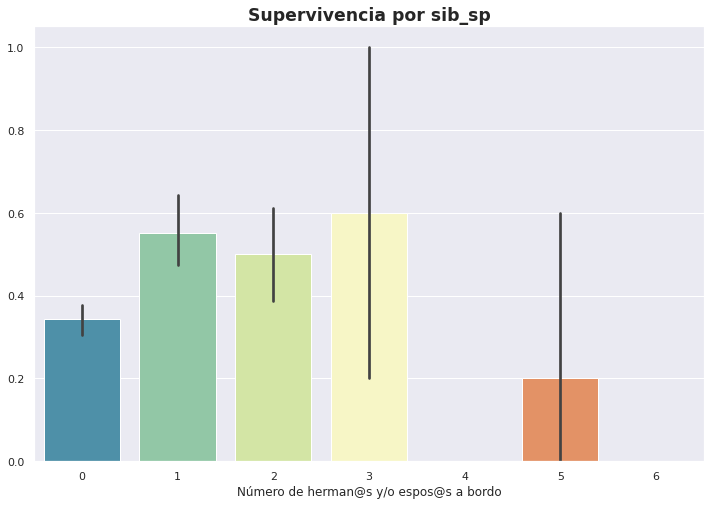

In [ ]:
plt.figure(figsize=(12,8))
g = sns.barplot(x='par_ch', y='survived', data=train, palette='Spectral_r')
g.set_title('Supervivencia por sib_sp',fontsize='x-large', 
               fontweight='bold')
g.set_xlabel('Número de herman@s y/o espos@s a bordo')
g.set_ylabel('')

#### ticket

In [ ]:
train['ticket'].head(15)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: ticket, dtype: object

#### fare

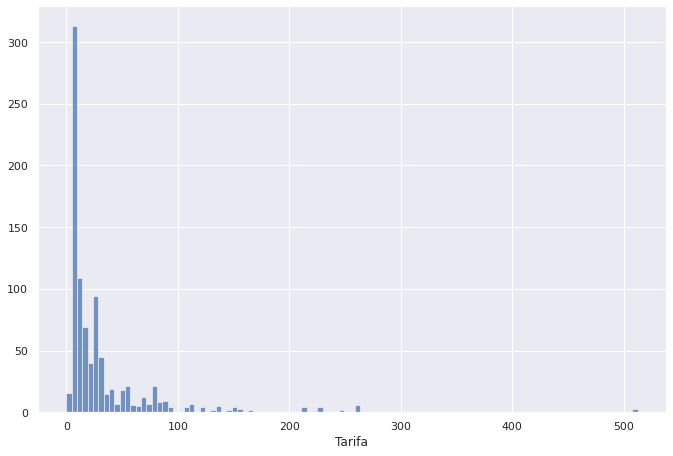

In [ ]:
g = sns.displot(x='fare', data=train, aspect=1.5, height=6.5)
g.set_axis_labels('Tarifa','')

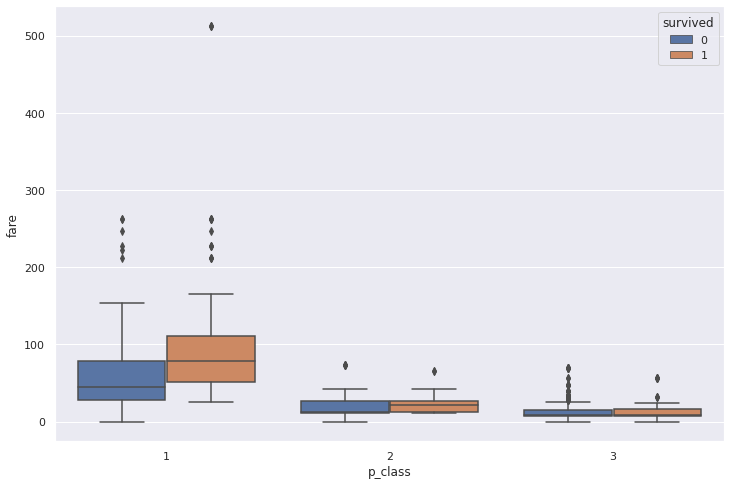

In [ ]:
plt.figure(figsize=(12,8))
g = sns.boxplot(x='p_class',y='fare',data=train, hue='survived')

#### embarked

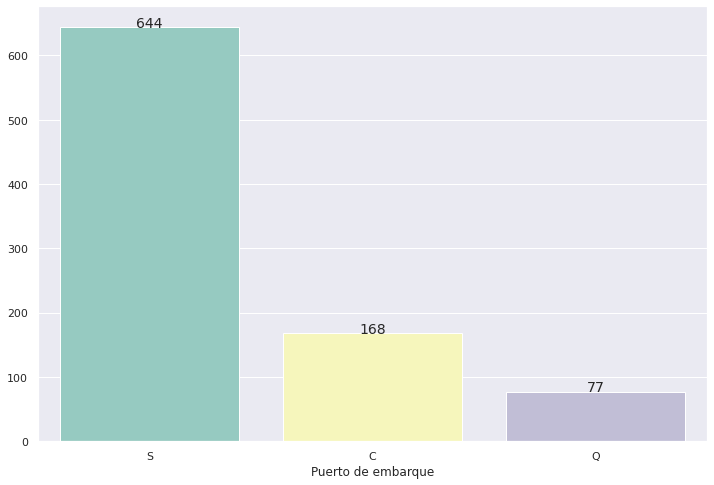

In [ ]:
plt.figure(figsize=(12,8))
g = sns.countplot(x = 'embarked', data=train, palette='Set3')
g.set_xlabel('Puerto de embarque')
g.set_ylabel('')
for p in g.patches:
    g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, \
                    p.get_height()+0.1), ha='center', size=14)

Text(0, 0.5, '')

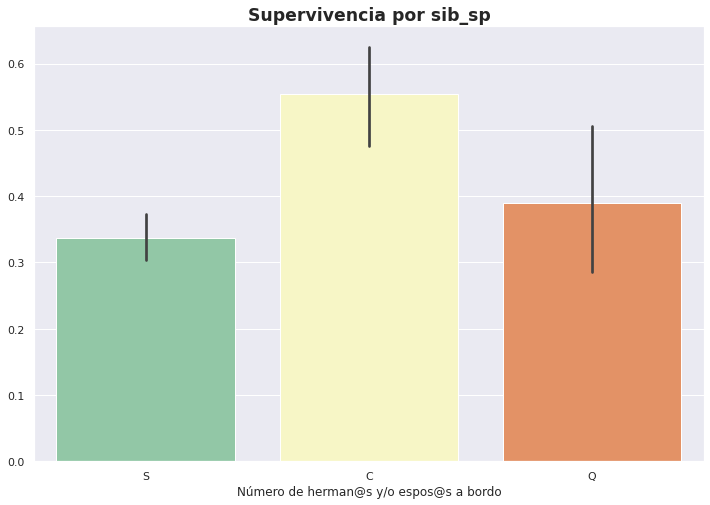

In [ ]:
plt.figure(figsize=(12,8))
g = sns.barplot(x='embarked', y='survived', data=train, palette='Spectral_r')
g.set_title('Supervivencia por sib_sp',fontsize='x-large', 
               fontweight='bold')
g.set_xlabel('Número de herman@s y/o espos@s a bordo')
g.set_ylabel('')

## Limpieza de datos

### name

In [ ]:
data = train.append(test)
data['title'] = data.name.str.extract('([A-Za-z]+)\.', expand=False)
data.groupby('sex')['title'].value_counts()

sex     title   
female  Miss        260
        Mrs         197
        Mlle          2
        Ms            2
        Countess      1
        Dona          1
        Dr            1
        Lady          1
        Mme           1
male    Mr          757
        Master       61
        Rev           8
        Dr            7
        Col           4
        Major         2
        Capt          1
        Don           1
        Jonkheer      1
        Sir           1
Name: title, dtype: int64

In [ ]:
data['title'].replace(['Mlle','Ms'],'Miss', inplace=True)
data['title'].replace(['Countess','Dona','Mme','Lady'],'Mrs', inplace=True)
data['title'].replace(['Rev','Col','Major','Capt','Don','Jonkheer','Sir'], 'Mr', inplace=True)

mask_uno = data['title']=='Dr' 
mask_dos = data['sex']=='male'
mask_tres = data['sex']=='female'
data['title'].mask(mask_uno & mask_dos, 'Mr', inplace=True)
data['title'].mask(mask_uno & mask_tres, 'Mrs', inplace=True)

In [ ]:
data.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [ ]:
train = data.iloc[:891,:] 
test = data.iloc[892:,:]

### age

In [ ]:
edad_por_titulo = train.groupby('title')['age'].mean()
edad_por_titulo

title
Master     4.574167
Miss      21.845638
Mr        32.984412
Mrs       35.991071
Name: age, dtype: float64

In [ ]:
for titulo in edad_por_titulo.index:
    train.loc[(train['age'].isna()) & (train['title']==titulo),'age'] = edad_por_titulo[titulo]
    test.loc[(test['age'].isna()) & (test['title']==titulo),'age'] = edad_por_titulo[titulo]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
train.loc[(train['age'].isna()) & (train['title']=='Miss'),'age']

Series([], Name: age, dtype: float64)

grafica boxp

### embarked

In [ ]:
train['embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: embarked, dtype: object

In [ ]:
top = 'S'
train.embarked.fillna(top, inplace=True)
train.embarked.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

### fare

In [ ]:
test['fare'].fillna(test['fare'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
train['fare'].sort_values(ascending=False).head()

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
Name: fare, dtype: float64

In [ ]:
train.loc[train['fare'] == 512.3292,'fare'] = train['fare'].median()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    float64
 2   p_class       891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           891 non-null    float64
 6   sib_sp        891 non-null    int64  
 7   par_ch        891 non-null    int64  
 8   ticket        891 non-null    object 
 9   fare          891 non-null    float64
 10  cabin         204 non-null    object 
 11  embarked      891 non-null    object 
 12  title         891 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 97.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 1 to 417
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  417 non-null    int64  
 1   survived      0 non-null      float64
 2   p_class       417 non-null    int64  
 3   name          417 non-null    object 
 4   sex           417 non-null    object 
 5   age           417 non-null    float64
 6   sib_sp        417 non-null    int64  
 7   par_ch        417 non-null    int64  
 8   ticket        417 non-null    object 
 9   fare          417 non-null    float64
 10  cabin         91 non-null     object 
 11  embarked      417 non-null    object 
 12  title         417 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 45.6+ KB


## Transformación de datos

### sex

In [ ]:
generos = {'male': 0, 'female':1}
data = [train,test]
for dataset in data:
    dataset['sex'] = dataset['sex'].map(generos).astype('int')

In [ ]:
train.head()

,passenger_id,survived,p_class,name,sex,age,sib_sp,par_ch,ticket,fare,cabin,embarked,title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,NaN,S,Mr


### age

In [ ]:
train['age'] = pd.qcut(train['age'],5, labels=[0,1,2,3,4])
test['age'] = pd.qcut(test['age'],5, labels=[0,1,2,3,4])

grafica 

### fare

In [ ]:
train['fare'] = pd.qcut(train['fare'], 5, labels=[0,1,2,3,4])
test['fare'] = pd.qcut(test['fare'], 5, labels=[0,1,2,3,4])

grafica

### embarked

In [ ]:
train['embarked'] = train['embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')
test['embarked'] = test['embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')

### title

In [ ]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4}
train['embarked'] = train['embarked'].map(titles).astype('int')
test['embarked'] = test['embarked'].map(titles).astype('int')

ValueError: ignored